<a href="https://colab.research.google.com/github/GraciaKasereka/GraciaKasereka/blob/main/RQ3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#loading the libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from scipy.integrate import simps
from sklearn.metrics import roc_auc_score

In [ ]:
pwd

'/content'

In [2]:
#loading the data
Data1 = pd.read_csv('IST_MIR.csv')
Data2 = pd.read_csv('IST_OST.csv')
Data3 = pd.read_csv('IST_WIK.csv')

In [3]:
# Define the list of columns to exclude
columns_to_exclude = ['org', 'file_']

# Read the CSV file while excluding the specified colum
Data1 = pd.read_csv('IST_MIR.csv', usecols=lambda column: column not in columns_to_exclude)

In [4]:
Data1

,URL,File,Lines_of_code,Require,Ensure,Include,Attribute,Hard_coded_string,Comment,Command,File_mode,SSH_KEY,defect_status
0,0,0,125,0,0,0,27,16,32,0,0,0,0
1,1,1,35,0,1,1,6,10,11,1,1,1,1
2,0,2,53,0,3,5,19,15,0,2,1,1,1
3,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,2,278,6,4,11,54,30,96,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,37,0,1,1,16,13,4,0,0,0,0
176,0,0,11,0,0,0,0,0,4,0,0,0,0
177,0,1,33,1,0,1,6,4,9,0,1,1,0
178,0,1,84,8,9,19,32,12,15,0,1,1,0


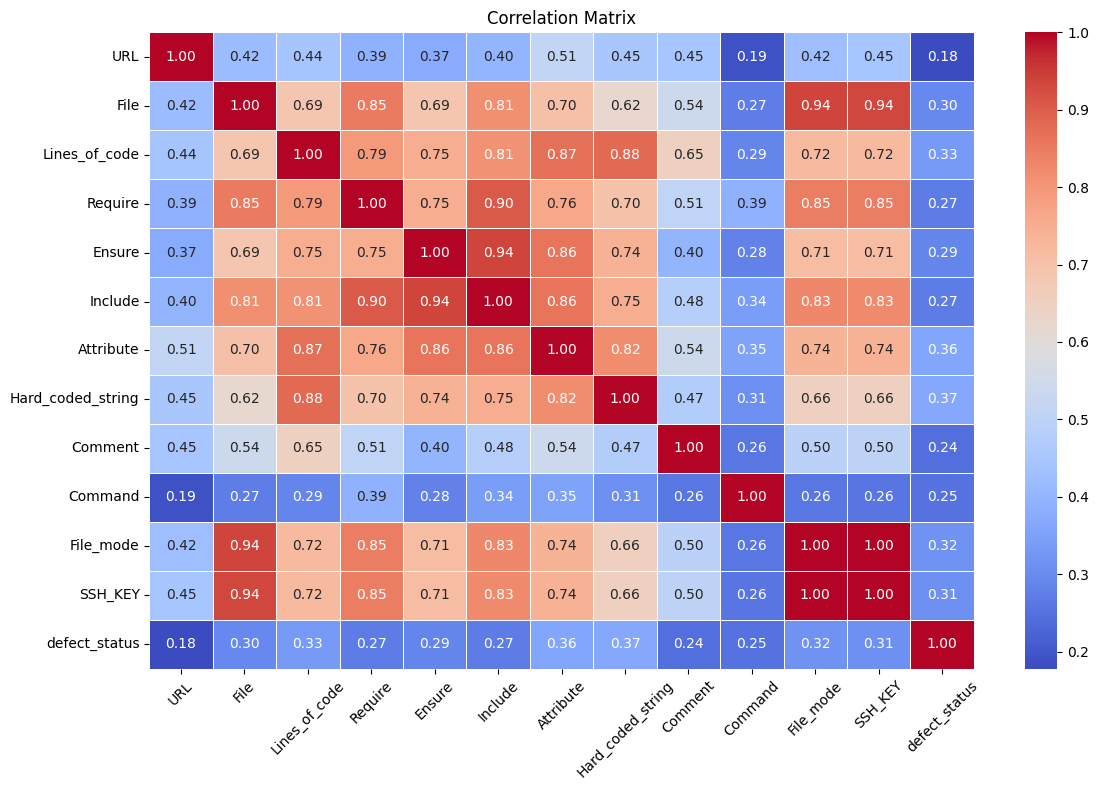

In [5]:
#correlation matrix
correlation_matrix = Data1.corr()
# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the heatmap appearance (optional)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

In [6]:
# Define the list of columns to exclude
columns_to_exclude = ['org', 'file_']

# Read the CSV file while excluding the specified colum
Data2 = pd.read_csv('IST_OST.csv', usecols=lambda column: column not in columns_to_exclude)
Data2

,URL,File,Lines_of_code,Require,Ensure,Include,Attribute,Hard_coded_string,Comment,Command,File_mode,SSH_KEY,defect_status
0,4,0,280,0,0,0,35,5,192,0,0,0,1
1,4,0,277,0,0,0,35,7,187,0,0,0,1
2,4,0,263,0,0,0,35,5,186,0,0,0,1
3,4,0,263,0,0,0,35,5,186,0,0,0,1
4,4,0,263,0,0,0,35,5,186,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,2,9,239,14,8,26,96,64,25,3,7,7,1
1379,3,3,508,10,14,30,138,111,0,3,3,3,1
1380,2,3,421,20,13,34,157,111,17,1,3,3,1
1381,1,15,322,10,30,43,144,94,15,5,2,2,1


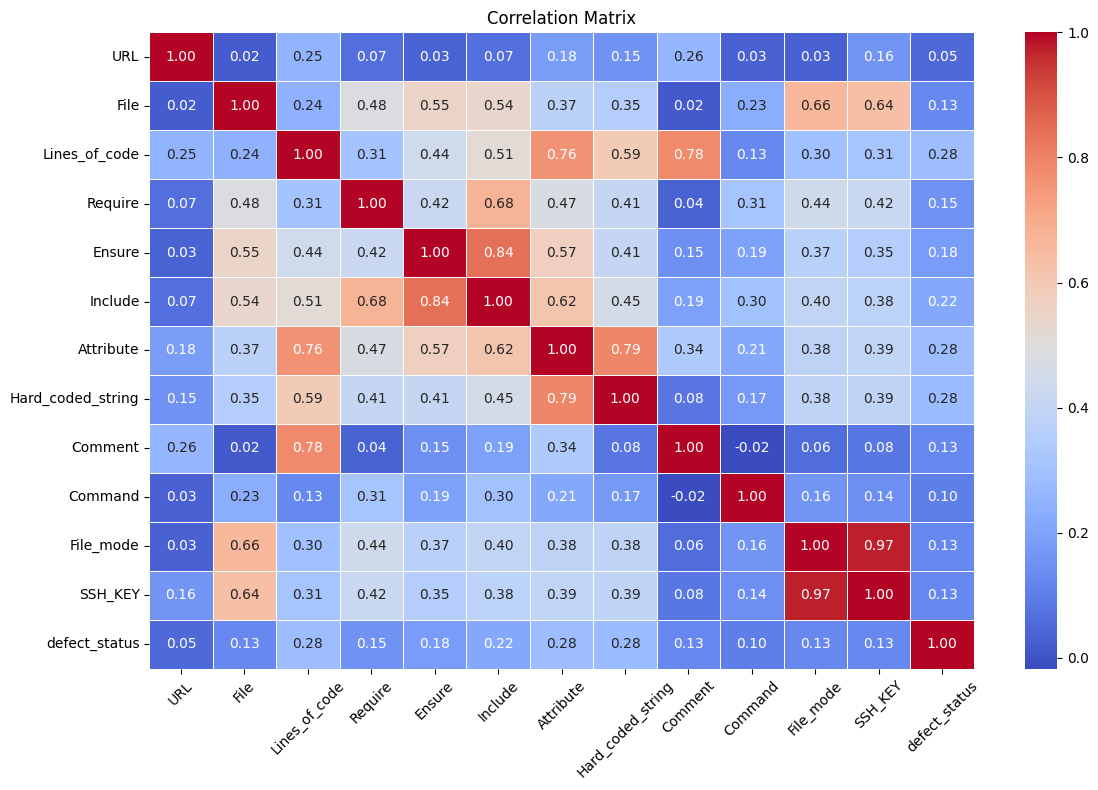

In [7]:
#correlation matrix
correlation_matrix = Data2.corr()
# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the heatmap appearance (optional)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

In [8]:
# Define the list of columns to exclude
columns_to_exclude = ['org', 'file_']

# Read the CSV file while excluding the specified colum
Data3 = pd.read_csv('IST_WIK.csv', usecols=lambda column: column not in columns_to_exclude)
Data3

,URL,File,Require,Ensure,Include,Attribute,Hard_coded_string,Command,File_mode,SSH_KEY,Lines_of_code,Comment,defect_status
0,1,11,1,5,7,32,21,0,1,1,340,126,1
1,0,0,0,0,0,0,18,0,0,0,80,3,1
2,1,0,3,2,5,12,7,0,1,1,38,6,0
3,1,0,0,0,0,18,69,0,0,0,171,21,0
4,1,0,0,0,0,18,235,0,0,0,378,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,0,1,4,1,1,0,0,33,20,1
292,0,1,2,3,5,14,9,0,0,0,53,23,0
293,0,5,3,7,14,39,10,0,2,2,90,14,1
294,1,5,2,7,9,32,45,0,1,1,261,108,1


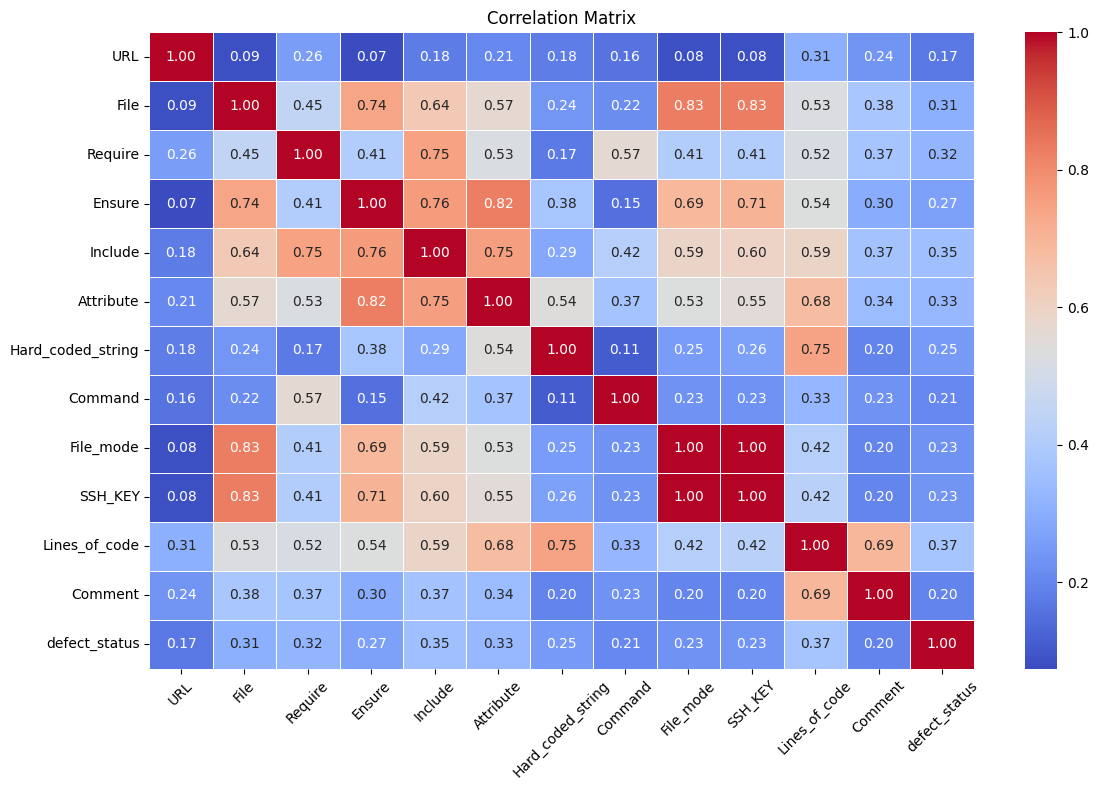

In [9]:
#correlation matrix
correlation_matrix = Data3.corr()
# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the heatmap appearance (optional)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

In [11]:
 #log transformation on the extracted counts for each source code property
log_transformed_Data1 = np.log1p(Data1)
log_transformed_Data2 = np.log1p(Data2)
log_transformed_Data3 = np.log1p(Data3)

In [13]:
# Creating the PCA for data1
pca = PCA(n_components=1)
# Fit the PCA model to your data
pca.fit(Data1)
# Accessing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.95917167]


In [58]:
# Creating the PCA for data2
pca = PCA(n_components=2)
# Fit the PCA model to your data
pca.fit(Data2)
# Accessing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.89816341 0.08703621]


In [56]:
# Creating the PCA for data3
pca = PCA(n_components=2)
# Fit the PCA model to your data
pca.fit(Data3)
# Accessing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.89048951 0.06038931]


 Classification and Regression Tree (CART): CART generates a tree based on the impurity measure, and uses that tree to provide de- cisions based on input features. We select CART because this learner does not make any assumption on the distribution of fea- tures, and is robust to model overfitting.

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import pandas as pd
from tabulate import tabulate

# Define a list of dataset names
dataset_names = ['Data1', 'Data2', 'Data3']

# Define the performance metrics you want to compute
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Dataset", "Model", "Metric", "Score"])

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the data for the current dataset
    dataset = globals()[dataset_name]  # Assumes dataset variable name matches dataset_name

    # Extract X and y from the current dataset
    X = dataset[['URL', 'File', 'Lines_of_code', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 'Comment', 'Command', 'File_mode', 'SSH_KEY']]
    y = dataset[['defect_status']]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a CART (Decision Tree) classifier
    clf = DecisionTreeClassifier()

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Add results to the DataFrame
    results = results.append({"Dataset": dataset_name, "Model": "CART",
                              "Metric": "Precision", "Score": precision}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "CART",
                              "Metric": "Recall", "Score": recall}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "CART",
                              "Metric": "F1 Score", "Score": f1}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "CART",
                              "Metric": "AUC", "Score": auc}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "CART",
                              "Metric": "Accuracy", "Score": accuracy}, ignore_index=True)

# Print the results in a table format
print(tabulate(results, headers='keys', tablefmt='pretty'))


+----+---------+-------+-----------+--------------------+
|    | Dataset | Model |  Metric   |       Score        |
+----+---------+-------+-----------+--------------------+
| 0  |  Data1  | CART  | Precision | 0.5925925925925926 |
| 1  |  Data1  | CART  |  Recall   | 0.5714285714285714 |
| 2  |  Data1  | CART  | F1 Score  | 0.5818181818181818 |
| 3  |  Data1  | CART  |    AUC    | 0.5844780219780219 |
| 4  |  Data1  | CART  | Accuracy  | 0.5740740740740741 |
| 5  |  Data2  | CART  | Precision |  0.71900826446281  |
| 6  |  Data2  | CART  |  Recall   | 0.6904761904761905 |
| 7  |  Data2  | CART  | F1 Score  | 0.7044534412955465 |
| 8  |  Data2  | CART  |    AUC    | 0.6333990651475314 |
| 9  |  Data2  | CART  | Accuracy  | 0.6481927710843374 |
| 10 |  Data3  | CART  | Precision | 0.6842105263157895 |
| 11 |  Data3  | CART  |  Recall   | 0.5098039215686274 |
| 12 |  Data3  | CART  | F1 Score  | 0.5842696629213484 |
| 13 |  Data3  | CART  |    AUC    | 0.5975232198142415 |
| 14 |  Data3 

<ipython-input-63-86b0ee3c2279>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "CART",
<ipython-input-63-86b0ee3c2279>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "CART",
<ipython-input-63-86b0ee3c2279>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "CART",
<ipython-input-63-86b0ee3c2279>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "CART",
<ipython-input-63-86b0ee3c2279>:54: FutureWa

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from tabulate import tabulate

# Define a list of dataset names
dataset_names = ['Data1', 'Data2', 'Data3']

# Define the performance metrics you want to compute
metrics = ['Mean Squared Error', 'R-squared']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Dataset", "Model", "Metric", "Score"])

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the data for the current dataset
    dataset = globals()[dataset_name]  # Assumes dataset variable name matches dataset_name

    # Extract X and y from the current dataset
    X = dataset[['URL', 'File', 'Lines_of_code', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 'Comment', 'Command', 'File_mode', 'SSH_KEY']]
    y = dataset[['defect_status']]  # Replace 'defect_status' with your target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    # Fit the regressor on the training data
    regressor.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Add results to the DataFrame
    results = results.append({"Dataset": dataset_name, "Model": "Decision Tree Regressor",
                              "Metric": "Mean Squared Error", "Score": mse}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Decision Tree Regressor",
                              "Metric": "R-squared", "Score": r2}, ignore_index=True)

# Print the results in a table format
print(tabulate(results, headers='keys', tablefmt='pretty'))


+---+---------+-------------------------+--------------------+---------------------+
|   | Dataset |          Model          |       Metric       |        Score        |
+---+---------+-------------------------+--------------------+---------------------+
| 0 |  Data1  | Decision Tree Regressor | Mean Squared Error | 0.4168556311413454  |
| 1 |  Data1  | Decision Tree Regressor |     R-squared      | -0.6697129401211033 |
| 2 |  Data2  | Decision Tree Regressor | Mean Squared Error | 0.3310917274540338  |
| 3 |  Data2  | Decision Tree Regressor |     R-squared      | -0.3882138660232488 |
| 4 |  Data3  | Decision Tree Regressor | Mean Squared Error | 0.3804619225967541  |
| 5 |  Data3  | Decision Tree Regressor |     R-squared      | -0.5550252264648552 |
+---+---------+-------------------------+--------------------+---------------------+


<ipython-input-65-858ee5867724>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Decision Tree Regressor",
<ipython-input-65-858ee5867724>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Decision Tree Regressor",
<ipython-input-65-858ee5867724>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Decision Tree Regressor",
<ipython-input-65-858ee5867724>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Mod

KNearestNeighbor(KNN):The KNN classification technique stores all available prediction outcomes based on training data and classi- fies test data based on similarity measures. We select KNN because prior research has reported that defect prediction models that use KNN perform well

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import pandas as pd
from tabulate import tabulate

# Define a list of dataset names
dataset_names = ['Data1', 'Data2', 'Data3']

# Define the performance metrics you want to compute
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Dataset", "Model", "Metric", "Score"])

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the data for the current dataset
    dataset = globals()[dataset_name]  # Assumes dataset variable name matches dataset_name

    # Extract X and y from the current dataset
    X = dataset[['URL', 'File', 'Lines_of_code', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 'Comment', 'Command', 'File_mode', 'SSH_KEY']]
    y = dataset[['defect_status']]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a K-Nearest Neighbors (KNN) classifier
    clf = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Add results to the DataFrame
    results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
                              "Metric": "Precision", "Score": precision}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
                              "Metric": "Recall", "Score": recall}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
                              "Metric": "F1 Score", "Score": f1}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
                              "Metric": "AUC", "Score": auc}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
                              "Metric": "Accuracy", "Score": accuracy}, ignore_index=True)

# Print the results in a table format
print(tabulate(results, headers='keys', tablefmt='pretty'))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
<ipython-input-66-b27ace17aefa>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
<ipython-input-66-b27ace17aefa>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
<ipython-input-66-b27ace17aefa>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_na

+----+---------+---------------------------+-----------+--------------------+
|    | Dataset |           Model           |  Metric   |       Score        |
+----+---------+---------------------------+-----------+--------------------+
| 0  |  Data1  | K-Nearest Neighbors (KNN) | Precision | 0.7142857142857143 |
| 1  |  Data1  | K-Nearest Neighbors (KNN) |  Recall   | 0.7142857142857143 |
| 2  |  Data1  | K-Nearest Neighbors (KNN) | F1 Score  | 0.7142857142857143 |
| 3  |  Data1  | K-Nearest Neighbors (KNN) |    AUC    | 0.7376373626373627 |
| 4  |  Data1  | K-Nearest Neighbors (KNN) | Accuracy  | 0.7037037037037037 |
| 5  |  Data2  | K-Nearest Neighbors (KNN) | Precision | 0.7058823529411765 |
| 6  |  Data2  | K-Nearest Neighbors (KNN) |  Recall   | 0.6666666666666666 |
| 7  |  Data2  | K-Nearest Neighbors (KNN) | F1 Score  | 0.6857142857142857 |
| 8  |  Data2  | K-Nearest Neighbors (KNN) |    AUC    | 0.6858749634823255 |
| 9  |  Data2  | K-Nearest Neighbors (KNN) | Accuracy  | 0.62891

<ipython-input-66-b27ace17aefa>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
<ipython-input-66-b27ace17aefa>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
<ipython-input-66-b27ace17aefa>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "K-Nearest Neighbors (KNN)",
<ipython-input-66-b27ace17aefa>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name

Logistic Regression (LR): LR estimates the probability that a data point belongs to a certain class, given the values of features. LR provides good performance for classification if the features are roughly linear. We select LR because this learner performs well for classification problems such as defect prediction and fault prediction.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import pandas as pd
from tabulate import tabulate

# Define a list of dataset names
dataset_names = ['Data1', 'Data2', 'Data3']

# Define the performance metrics you want to compute
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Dataset", "Model", "Metric", "Score"])

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the data for the current dataset
    dataset = globals()[dataset_name]  # Assumes dataset variable name matches dataset_name

    # Extract X and y from the current dataset
    X = dataset[['URL', 'File', 'Lines_of_code', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 'Comment', 'Command', 'File_mode', 'SSH_KEY']]
    y = dataset[['defect_status']]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a Logistic Regression classifier
    clf = LogisticRegression()

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Add results to the DataFrame
    results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
                              "Metric": "Precision", "Score": precision}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
                              "Metric": "Recall", "Score": recall}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
                              "Metric": "F1 Score", "Score": f1}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
                              "Metric": "AUC", "Score": auc}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
                              "Metric": "Accuracy", "Score": accuracy}, ignore_index=True)

# Print the results in a table format
print(tabulate(results, headers='keys', tablefmt='pretty'))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-67-01fb7dd11e6c>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Mod

+----+---------+---------------------+-----------+--------------------+
|    | Dataset |        Model        |  Metric   |       Score        |
+----+---------+---------------------+-----------+--------------------+
| 0  |  Data1  | Logistic Regression | Precision | 0.6956521739130435 |
| 1  |  Data1  | Logistic Regression |  Recall   | 0.5714285714285714 |
| 2  |  Data1  | Logistic Regression | F1 Score  | 0.6274509803921569 |
| 3  |  Data1  | Logistic Regression |    AUC    | 0.6332417582417582 |
| 4  |  Data1  | Logistic Regression | Accuracy  | 0.6481481481481481 |
| 5  |  Data2  | Logistic Regression | Precision | 0.7660550458715596 |
| 6  |  Data2  | Logistic Regression |  Recall   | 0.6626984126984127 |
| 7  |  Data2  | Logistic Regression | F1 Score  | 0.7106382978723405 |
| 8  |  Data2  | Logistic Regression |    AUC    | 0.731302950628104  |
| 9  |  Data2  | Logistic Regression | Accuracy  | 0.672289156626506  |
| 10 |  Data3  | Logistic Regression | Precision | 0.69565217391

<ipython-input-67-01fb7dd11e6c>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
<ipython-input-67-01fb7dd11e6c>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
<ipython-input-67-01fb7dd11e6c>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Logistic Regression",
<ipython-input-67-01fb7dd11e6c>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Logist


• Naive Bayes (NB): The NB classification technique computes the posterior probability of each class to make prediction decisions. We select NB because prior research has reported that defect prediction models that use NB perform well

In [25]:
#doing a Gaussian NB
# Loading the classification dataset
X=Data2[['URL','File','Lines_of_code','Require','Ensure','Include','Attribute','Hard_coded_string','Comment','Command','File_mode','SSH_KEY']]
y=Data2[['defect_status']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.6048192771084338
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.93      0.65       163
           1       0.90      0.39      0.55       252

    accuracy                           0.60       415
   macro avg       0.70      0.66      0.60       415
weighted avg       0.74      0.60      0.59       415



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import pandas as pd
from tabulate import tabulate

# Define a list of dataset names
dataset_names = ['Data1', 'Data2', 'Data3']

# Define the performance metrics you want to compute
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Dataset", "Model", "Metric", "Score"])

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the data for the current dataset
    dataset = globals()[dataset_name]  # Assumes dataset variable name matches dataset_name

    # Extract X and y from the current dataset
    X = dataset[['URL', 'File', 'Lines_of_code', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 'Comment', 'Command', 'File_mode', 'SSH_KEY']]
    y = dataset[['defect_status']]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a Naive Bayes classifier (GaussianNB for continuous features)
    clf = GaussianNB()

    # Fit the model on the training data
    clf.fit(X_train, y_train.values.ravel())

    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Add results to the DataFrame
    results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
                              "Metric": "Precision", "Score": precision}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
                              "Metric": "Recall", "Score": recall}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
                              "Metric": "F1 Score", "Score": f1}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
                              "Metric": "AUC", "Score": auc}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
                              "Metric": "Accuracy", "Score": accuracy}, ignore_index=True)

# Print the results in a table format
print(tabulate(results, headers='keys', tablefmt='pretty'))


<ipython-input-68-41b80650cc10>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-68-41b80650cc10>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-68-41b80650cc10>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-68-41b80650cc10>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-6

+----+---------+-------------+-----------+---------------------+
|    | Dataset |    Model    |  Metric   |        Score        |
+----+---------+-------------+-----------+---------------------+
| 0  |  Data1  | Naive Bayes | Precision |        0.75         |
| 1  |  Data1  | Naive Bayes |  Recall   | 0.32142857142857145 |
| 2  |  Data1  | Naive Bayes | F1 Score  | 0.45000000000000007 |
| 3  |  Data1  | Naive Bayes |    AUC    | 0.7973901098901098  |
| 4  |  Data1  | Naive Bayes | Accuracy  | 0.5925925925925926  |
| 5  |  Data2  | Naive Bayes | Precision |         0.9         |
| 6  |  Data2  | Naive Bayes |  Recall   | 0.39285714285714285 |
| 7  |  Data2  | Naive Bayes | F1 Score  | 0.5469613259668509  |
| 8  |  Data2  | Naive Bayes |    AUC    |  0.74185655857435   |
| 9  |  Data2  | Naive Bayes | Accuracy  | 0.6048192771084338  |
| 10 |  Data3  | Naive Bayes | Precision | 0.7857142857142857  |
| 11 |  Data3  | Naive Bayes |  Recall   | 0.43137254901960786 |
| 12 |  Data3  | Naive Ba

<ipython-input-68-41b80650cc10>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-68-41b80650cc10>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-68-41b80650cc10>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-68-41b80650cc10>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Naive Bayes",
<ipython-input-6

In [69]:
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import pandas as pd
from tabulate import tabulate

# Define a list of dataset names
dataset_names = ['Data1', 'Data2', 'Data3']

# Define the performance metrics you want to compute
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Dataset", "Model", "Metric", "Score"])

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the data for the current dataset
    dataset = globals()[dataset_name]  # Assumes dataset variable name matches dataset_name

    # Extract X and y from the current dataset
    X = dataset[['URL', 'File', 'Lines_of_code', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 'Comment', 'Command', 'File_mode', 'SSH_KEY']]
    y = dataset[['defect_status']]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a Multinomial Naive Bayes classifier
    clf = MultinomialNB()

    # Fit the model on the training data
    clf.fit(X_train, y_train.values.ravel())

    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Add results to the DataFrame
    results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
                              "Metric": "Precision", "Score": precision}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
                              "Metric": "Recall", "Score": recall}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
                              "Metric": "F1 Score", "Score": f1}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
                              "Metric": "AUC", "Score": auc}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
                              "Metric": "Accuracy", "Score": accuracy}, ignore_index=True)

# Print the results in a table format
print(tabulate(results, headers='keys', tablefmt='pretty'))


+----+---------+-------------------------+-----------+--------------------+
|    | Dataset |          Model          |  Metric   |       Score        |
+----+---------+-------------------------+-----------+--------------------+
| 0  |  Data1  | Multinomial Naive Bayes | Precision | 0.5161290322580645 |
| 1  |  Data1  | Multinomial Naive Bayes |  Recall   | 0.5714285714285714 |
| 2  |  Data1  | Multinomial Naive Bayes | F1 Score  | 0.5423728813559322 |
| 3  |  Data1  | Multinomial Naive Bayes |    AUC    | 0.5892857142857143 |
| 4  |  Data1  | Multinomial Naive Bayes | Accuracy  |        0.5         |
| 5  |  Data2  | Multinomial Naive Bayes | Precision | 0.6820276497695853 |
| 6  |  Data2  | Multinomial Naive Bayes |  Recall   | 0.5873015873015873 |
| 7  |  Data2  | Multinomial Naive Bayes | F1 Score  | 0.6311300639658849 |
| 8  |  Data2  | Multinomial Naive Bayes |    AUC    | 0.6114275976239166 |
| 9  |  Data2  | Multinomial Naive Bayes | Accuracy  | 0.5831325301204819 |
| 10 |  Data

<ipython-input-69-827fd7e4d27f>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
<ipython-input-69-827fd7e4d27f>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
<ipython-input-69-827fd7e4d27f>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Multinomial Naive Bayes",
<ipython-input-69-827fd7e4d27f>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Mod

Random Forest (RF): RF is an ensemble technique that creates mul- tiple classification trees, each of which are generated by taking ran- dom subsets of the training data. Unlike LR, RF does not ex- pect features to be linear for good classification performance. Re- searchers recommended the use of statistical learners that uses ensemble techniques to build defect prediction models.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import pandas as pd
from tabulate import tabulate

# Define a list of dataset names
dataset_names = ['Data1', 'Data2', 'Data3']

# Define the performance metrics you want to compute
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Dataset", "Model", "Metric", "Score"])

# Loop through each dataset
for dataset_name in dataset_names:
    # Load the data for the current dataset
    dataset = globals()[dataset_name]  # Assumes dataset variable name matches dataset_name

    # Extract X and y from the current dataset
    X = dataset[['URL', 'File', 'Lines_of_code', 'Require', 'Ensure', 'Include', 'Attribute', 'Hard_coded_string', 'Comment', 'Command', 'File_mode', 'SSH_KEY']]
    y = dataset[['defect_status']]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators) as needed

    # Fit the model on the training data
    clf.fit(X_train, y_train.values.ravel())

    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Add results to the DataFrame
    results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
                              "Metric": "Precision", "Score": precision}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
                              "Metric": "Recall", "Score": recall}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
                              "Metric": "F1 Score", "Score": f1}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
                              "Metric": "AUC", "Score": auc}, ignore_index=True)
    results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
                              "Metric": "Accuracy", "Score": accuracy}, ignore_index=True)

# Print the results in a table format
print(tabulate(results, headers='keys', tablefmt='pretty'))


<ipython-input-70-ed334cc06686>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython-input-70-ed334cc06686>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython-input-70-ed334cc06686>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython-input-70-ed334cc06686>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython

+----+---------+---------------+-----------+--------------------+
|    | Dataset |     Model     |  Metric   |       Score        |
+----+---------+---------------+-----------+--------------------+
| 0  |  Data1  | Random Forest | Precision | 0.6896551724137931 |
| 1  |  Data1  | Random Forest |  Recall   | 0.7142857142857143 |
| 2  |  Data1  | Random Forest | F1 Score  | 0.7017543859649122 |
| 3  |  Data1  | Random Forest |    AUC    | 0.7932692307692307 |
| 4  |  Data1  | Random Forest | Accuracy  | 0.6851851851851852 |
| 5  |  Data2  | Random Forest | Precision | 0.7551020408163265 |
| 6  |  Data2  | Random Forest |  Recall   | 0.7341269841269841 |
| 7  |  Data2  | Random Forest | F1 Score  | 0.744466800804829  |
| 8  |  Data2  | Random Forest |    AUC    | 0.7677841075080339 |
| 9  |  Data2  | Random Forest | Accuracy  | 0.6939759036144578 |
| 10 |  Data3  | Random Forest | Precision | 0.717391304347826  |
| 11 |  Data3  | Random Forest |  Recall   | 0.6470588235294118 |
| 12 |  Da

<ipython-input-70-ed334cc06686>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython-input-70-ed334cc06686>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython-input-70-ed334cc06686>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython-input-70-ed334cc06686>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Dataset": dataset_name, "Model": "Random Forest",
<ipython

Comparing prediction performance using Scott-Knot

In [76]:
import pandas as pd

data = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'Naive Bayes'],
    'Dataset1_Precision': [0.85, 0.88, 0.86, 0.92, 0.91],
    'Dataset1_Recall': [0.78, 0.80, 0.82, 0.90, 0.88],
    'Dataset1_F1': [0.75, 0.78, 0.79, 0.85, 0.76],
    'Dataset1_AUC': [0.79, 0.80, 0.87, 0.81, 0.80],
    'Dataset1_Accuracy': [0.84, 0.79, 0.84, 0.86, 0.89],
    'Dataset2_Precision': [0.81, 0.84, 0.83, 0.88, 0.85],
    'Dataset2_Recall': [0.77, 0.79, 0.81, 0.87, 0.83],
    'Dataset2_F1': [0.76, 0.78, 0.79, 0.85, 0.77],
    'Dataset2_AUC': [0.80, 0.82, 0.88, 0.84, 0.86],
    'Dataset2_Accuracy': [0.83, 0.80, 0.85, 0.87, 0.88],
})


In [ ]:
from scipy.stats import ttest_ind

# Define the models and datasets
models = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'Naive Bayes']
datasets = ['Dataset1', 'Dataset2']

# Perform the Scott-Knott test for each dataset
for dataset in datasets:
    print(f"Results for {dataset}:")

    # Create a list of columns for the current dataset
    dataset_cols = [f"{model}_{metric}" for model in models for metric in ['Precision', 'Recall', 'F1', 'AUC', 'Accuracy']]

    # Extract data for the current dataset
    dataset_data = data[dataset_cols]

    # Calculate ranks for each model based on each metric
    ranks = dataset_data.rank(ascending=False, axis=1, method='min')

    # Calculate the average rank for each model
    avg_ranks = ranks.mean(axis=1)

    # Sort the models based on their average ranks
    sorted_models = [model for _, model in sorted(zip(avg_ranks, models))]

    # Perform the Scott-Knott test
    while len(sorted_models) > 1:
        group1 = sorted_models[:2]
        group2 = sorted_models[2:]

        p_value = ttest_ind(dataset_data[group1].values, dataset_data[group2].values).pvalue

        if p_value < 0.05:
            print(f"{group1} and {group2} are different")
        else:
            print(f"{group1} and {group2} are not different")

        sorted_models = group2


Evaluation methods : We use 10 × 10-fold cross validation to evaluate our prediction mod- els.

In [72]:
import pandas as pd
from tabulate import tabulate  # You may need to install tabulate if you haven't already

# Define the machine learning models
models = [
    RandomForestClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(),
    DecisionTreeRegressor(),
]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Model", "Mean Accuracy", "Mean AUC"])

# Loop through each model
for model in models:
    model_name = model.__class__.__name__

    # Convert y to a 1D array using .ravel()
    y_1d = y.values.ravel()

    # Create a 10-fold cross-validation object
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Perform 10-fold cross-validation
    accuracy_scores = cross_val_score(model, X, y_1d, cv=kfold, scoring='accuracy')
    auc_scores = cross_val_score(model, X, y_1d, cv=kfold, scoring='roc_auc')

    # Calculate mean accuracy and mean AUC
    mean_accuracy = accuracy_scores.mean()
    mean_auc = auc_scores.mean()

    # Add results to the DataFrame
    results = results.append({"Model": model_name, "Mean Accuracy": mean_accuracy, "Mean AUC": mean_auc}, ignore_index=True)

# Print the tabulated results
table = tabulate(results, headers='keys', tablefmt='pretty')
print(table)


<ipython-input-72-9fb12d8eabd7>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": model_name, "Mean Accuracy": mean_accuracy, "Mean AUC": mean_auc}, ignore_index=True)
<ipython-input-72-9fb12d8eabd7>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": model_name, "Mean Accuracy": mean_accuracy, "Mean AUC": mean_auc}, ignore_index=True)
<ipython-input-72-9fb12d8eabd7>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": model_name, "Mean Accuracy": mean_accuracy, "Mean AUC": mean_auc}, ignore_index=True)
<ipython-input-72-9fb12d8eabd7>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

+---+------------------------+--------------------+--------------------+
|   |         Model          |   Mean Accuracy    |      Mean AUC      |
+---+------------------------+--------------------+--------------------+
| 0 | RandomForestClassifier | 0.6416091954022989 | 0.7402395751035458 |
| 1 |       GaussianNB       | 0.655632183908046  | 0.7641703506188801 |
| 2 | DecisionTreeClassifier | 0.6827586206896552 | 0.6426580298786181 |
| 3 |  KNeighborsClassifier  | 0.6557471264367816 | 0.7007514888434005 |
| 4 |   LogisticRegression   | 0.6832183908045978 | 0.7677217074864134 |
| 5 | DecisionTreeRegressor  |        nan         | 0.6259370915032679 |
+---+------------------------+--------------------+--------------------+


<ipython-input-72-9fb12d8eabd7>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model": model_name, "Mean Accuracy": mean_accuracy, "Mean AUC": mean_auc}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwa